## Face Recognition

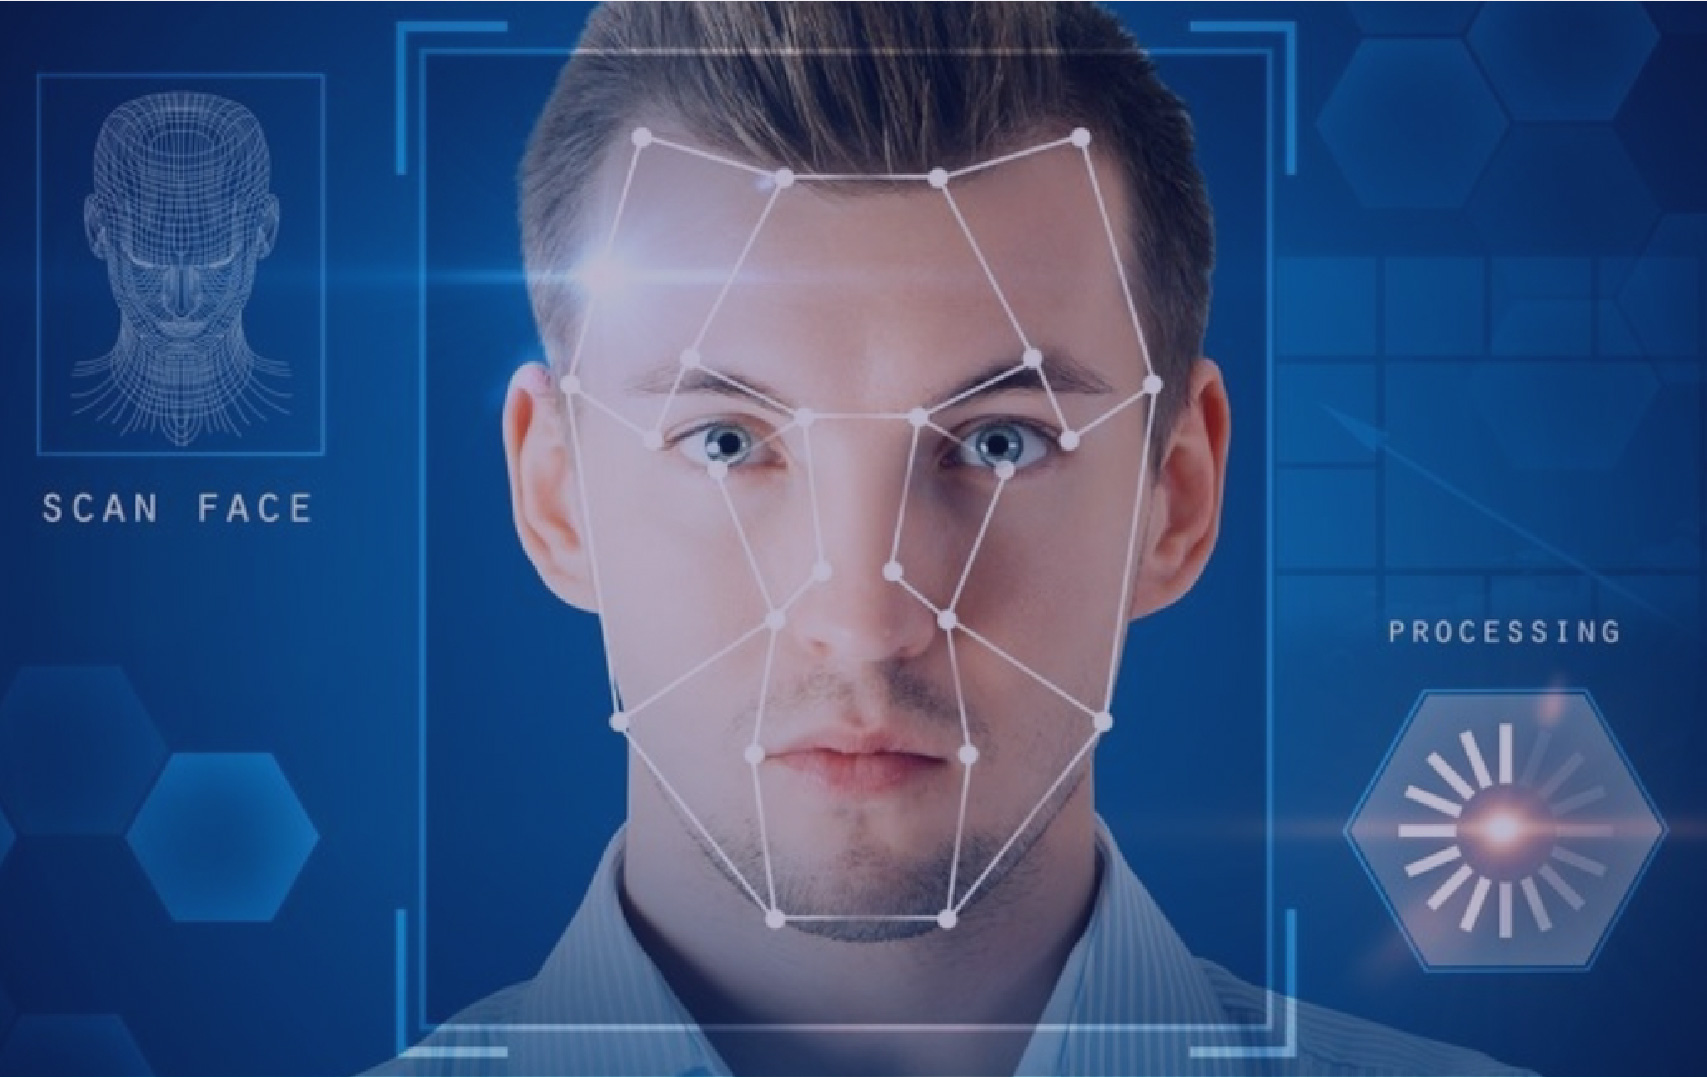


### 📢Situation description:
#### There are 3 suspects and we have to find the real thief


### 🆘Problems:
#### Who is robber ?


#### 🔎Let's find robber

In [ ]:
#Let's firstly install libraries
!apt update
!apt install -y cmake
!pip install dlib
!pip install face_recognition

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [494 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [984 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,182 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [9

In [ ]:
#Import libraries
import numpy as np
from PIL import Image , ImageDraw
import face_recognition
import matplotlib.pyplot as plt

In [ ]:
#Let's save image from web
#Suspect1
!wget https://media-cldnry.s-nbcnews.com/image/upload/t_fit-760w,f_auto,q_auto:best/msnbc/Components/Photos/070723/070723_hat_vmed_5p.jpg
#Suspect2
!wget https://bloximages.newyork1.vip.townnews.com/citizensvoice.com/content/tncms/assets/v3/editorial/9/0a/90abdd4c-3b24-5363-9df2-c5346dfe929a/5e580e139d9e5.image.jpg?resize=375%2C500
#Suspect3
!wget https://bloximages.newyork1.vip.townnews.com/citizensvoice.com/content/tncms/assets/v3/editorial/c/52/c5223242-1436-5a7d-9c97-354d41c6c420/5e580e13a6277.image.jpg
#Suspect4
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/43B6/production/_117843371_gettyimages-1230390852.jpg
#Robber
!wget https://resize.indiatvnews.com/en/resize/newbucket/1200_-/2020/03/akshay-1585303891.jpg

--2023-08-30 18:08:26--  https://media-cldnry.s-nbcnews.com/image/upload/t_fit-760w,f_auto,q_auto:best/msnbc/Components/Photos/070723/070723_hat_vmed_5p.jpg
Resolving media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)... 104.78.231.84, 2600:1407:3c00:a8e::a1d, 2600:1407:3c00:a85::a1d
Connecting to media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)|104.78.231.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62189 (61K) [image/jpeg]
Saving to: ‘070723_hat_vmed_5p.jpg’

070723_hat_vmed_5p. 100%[===================>]  60.73K  --.-KB/s    in 0.02s   

2023-08-30 18:08:26 (3.73 MB/s) - ‘070723_hat_vmed_5p.jpg’ saved [62189/62189]

--2023-08-30 18:08:26--  https://bloximages.newyork1.vip.townnews.com/citizensvoice.com/content/tncms/assets/v3/editorial/9/0a/90abdd4c-3b24-5363-9df2-c5346dfe929a/5e580e139d9e5.image.jpg?resize=375%2C500
Resolving bloximages.newyork1.vip.townnews.com (bloximages.newyork1.vip.townnews.com)... 104.16.133.24, 104.16.132.24
Connec

In [ ]:
#Let's create a function which converts image to numpy array
def load_image(infilename):
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img,dtype = "int32")
    return data

In [ ]:
#Let's load images
suspect_1 = face_recognition.load_image_file('070723_hat_vmed_5p.jpg')
suspect_2 = face_recognition.load_image_file('5e580e139d9e5.image.jpg?resize=375,500')
suspect_3 = face_recognition.load_image_file('5e580e13a6277.image.jpg')
suspect_4 = face_recognition.load_image_file('_117843371_gettyimages-1230390852.jpg')
robber = face_recognition.load_image_file('akshay-1585303891.jpg')

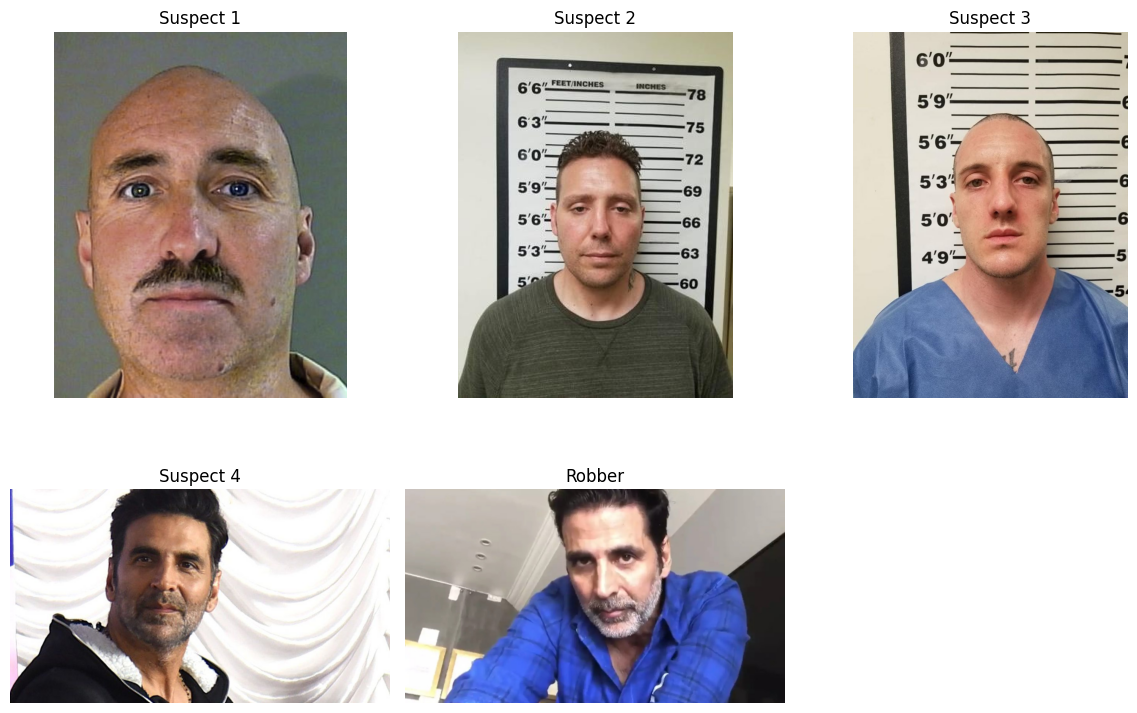

In [ ]:
#Let's look at images (suspects and robber)
images = [suspect_1, suspect_2, suspect_3, suspect_4, robber]
# Plot the images
plt.figure(figsize=(12, 8))
for i, img in enumerate(images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    if i < 4:
        plt.title(f"Suspect {i + 1}")
    else:
        plt.title(f"Robber")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#Let's find location of face
face_location1 = face_recognition.face_locations(suspect_1)
face_location2 = face_recognition.face_locations(suspect_2)
face_location3 = face_recognition.face_locations(suspect_3)
face_location4 = face_recognition.face_locations(suspect_4)
face_location5 = face_recognition.face_locations(robber)

In [ ]:
#Let's encode images
en1 = face_recognition.face_encodings(suspect_1)[0]
en2 = face_recognition.face_encodings(suspect_2)[0]
en3 = face_recognition.face_encodings(suspect_3)[0]
en4 = face_recognition.face_encodings(suspect_4)[0]
en5 = face_recognition.face_encodings(robber)[0]

In [ ]:
#Let's compare faces of images
results1 = face_recognition.compare_faces([en5],en1)
results2 = face_recognition.compare_faces([en5],en2)
results3 = face_recognition.compare_faces([en5],en3)
results4 = face_recognition.compare_faces([en5],en4)

In [ ]:
#Let's look at results
results = [results1, results2, results3, results4]
suspect_names = ["Suspect1", "Suspect2", "Suspect3", "Suspect4"]
analyze = {}
for name, result in zip(suspect_names, results):
    analyze[name] = result
    print(f"{name}: {result}")

Suspect1: [False]
Suspect2: [False]
Suspect3: [False]
Suspect4: [True]


In [ ]:
#Let's look at dictionary
analyze

{'Suspect1': [False],
 'Suspect2': [False],
 'Suspect3': [False],
 'Suspect4': [True]}

In [ ]:
#Let's look at result and find robber
for name , result in analyze.items():
   if result == [False]:
    print(f"{name}:")
    print('This suspect is innocent !')
    print('=================================')
   else:
    print(f"{name}:")
    print('This suspect is robber !!!')

Suspect1:
This suspect is innocent !
Suspect2:
This suspect is innocent !
Suspect3:
This suspect is innocent !
Suspect4:
This suspect is robber !!!


In [ ]:
(top1,right1,bottom1,left1) = face_location1[0]
(top2,right2,bottom2,left2) = face_location2[0]
(top3,right3,bottom3,left3) = face_location3[0]
(top4,right4,bottom4,left4) = face_location4[0]
(top5,right5,bottom5,left5) = face_location5[0]

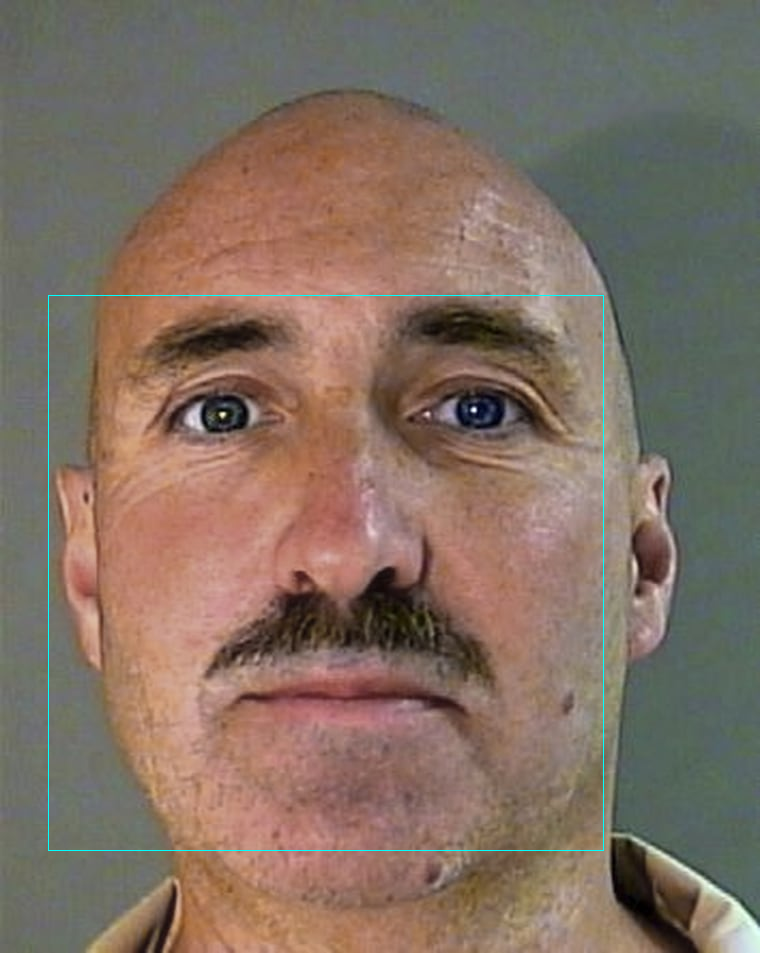

In [ ]:
#Let's detect face of suspect 1
pil_image = Image.fromarray(suspect_1)
draw = ImageDraw.Draw(pil_image)
draw.rectangle(((left1,top1), (right1,bottom1)),outline = (0,255,255))
pil_image

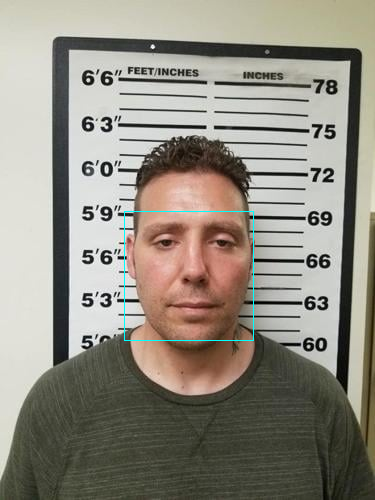

In [ ]:
#Let's detect face of suspect 2
pil_image = Image.fromarray(suspect_2)
draw = ImageDraw.Draw(pil_image)
draw.rectangle(((left2,top2), (right2,bottom2)),outline = (0,255,255))
pil_image

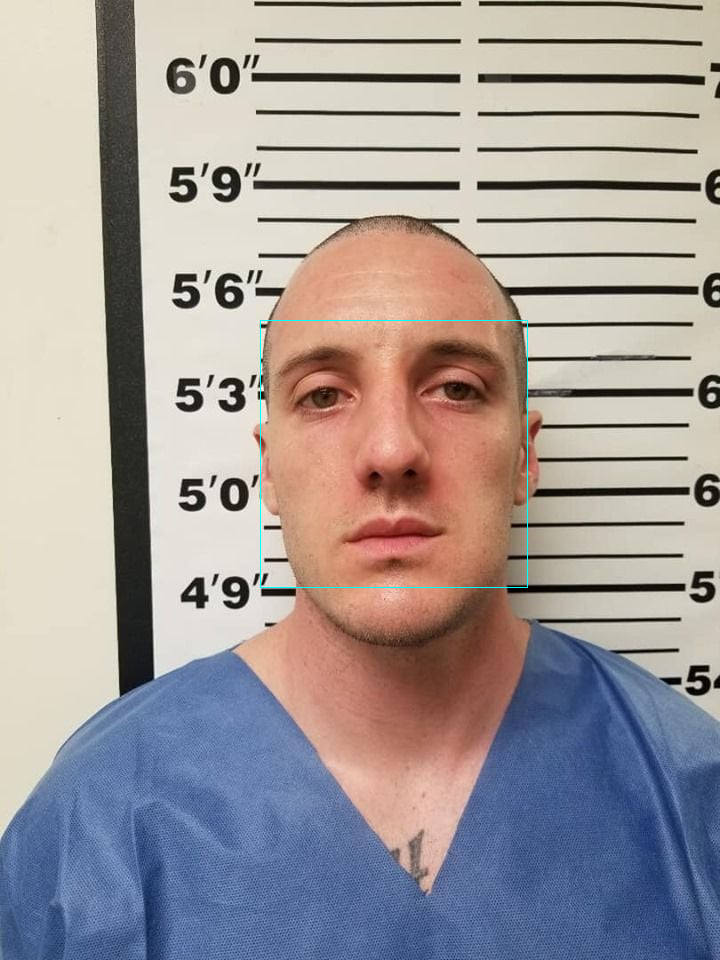

In [ ]:
#Let's detect face of suspect 3
pil_image = Image.fromarray(suspect_3)
draw = ImageDraw.Draw(pil_image)
draw.rectangle(((left3,top3), (right3,bottom3)),outline = (0,255,255))
pil_image

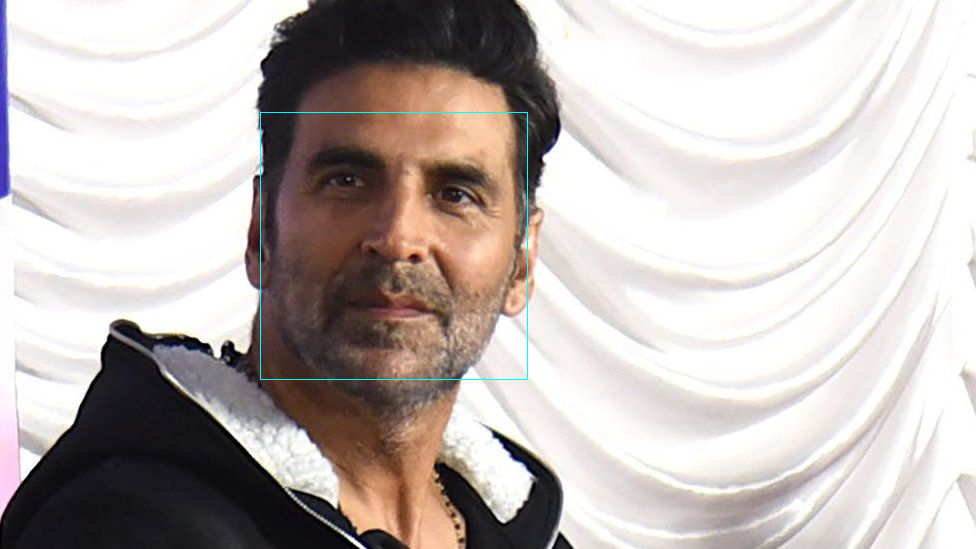

In [ ]:
#Let's detect face of suspect 4
pil_image = Image.fromarray(suspect_4)
draw = ImageDraw.Draw(pil_image)
draw.rectangle(((left4,top4), (right4,bottom4)),outline = (0,255,255))
pil_image

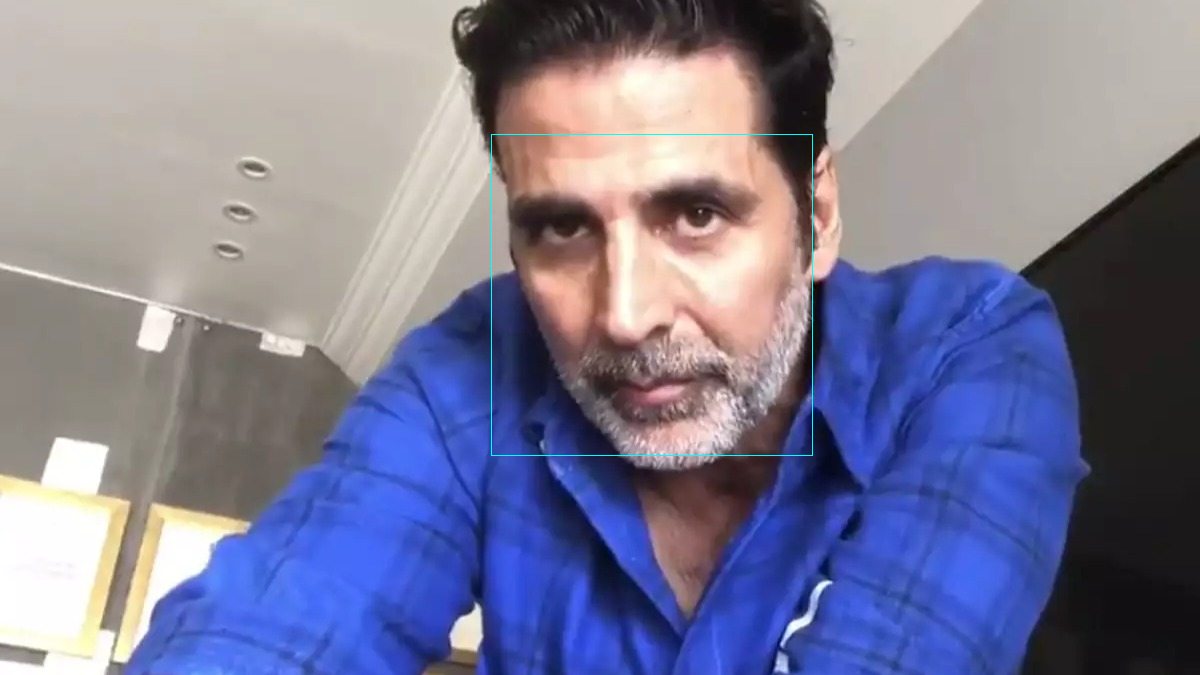

In [ ]:
#Let's detect face of suspect 5
pil_image = Image.fromarray(robber)
draw = ImageDraw.Draw(pil_image)
draw.rectangle(((left5,top5), (right5,bottom5)),outline = (0,255,255))
pil_image

### 🔑As a result, the suspect_4 is a robber